In [83]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
import pickle


### Following
- https://realpython.com/python-keras-text-classification/
- https://datascience.stackexchange.com/questions/25581/what-is-the-difference-between-countvectorizer-token-counts-and-tfidftransformer

In [84]:
df = pd.read_csv('posts_all_filtered.csv', header=None)
df.columns = ['category','content']
print(len(df.index))

964


In [85]:
df.head(2)

,category,content
0,relationships,previous post link tl dr pretty sure got direc...
1,relationships,situation worked hard rise humble beginning ge...


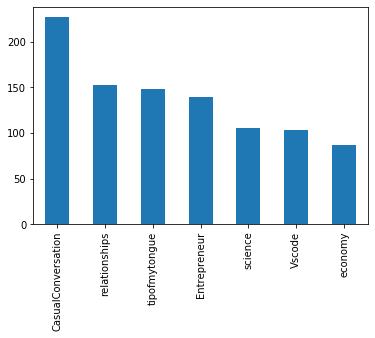

In [86]:
#balance classes
df.category.value_counts().plot(kind='bar')

In [87]:
min_category = False
categories = df.category.unique()
for category in categories:
    curr_category = len(df[df.category == category].index)
    if min_category:
        min_category = min(min_category, curr_category)
    else:
        min_category = curr_category
print(min_category)
res = []
for category in categories:
    res.append(df[df.category == category].sample(min_category))
df = pd.concat(res)
print(len(df.index))

87
609


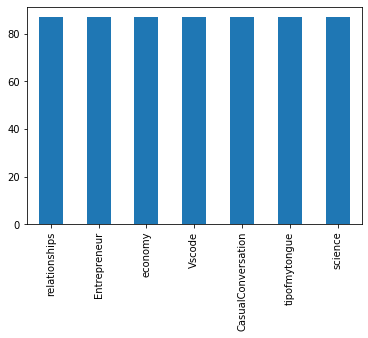

In [88]:
df.category.value_counts().plot(kind='bar')

In [89]:
train_x, valid_x, train_y, valid_y = train_test_split(df['content'], df['category'],test_size=0.2, random_state=0)


In [99]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300


In [101]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)


In [104]:
features_train = tfidf.fit_transform(train_x).toarray()
labels_train = train_y
print(features_train.shape)

features_test = tfidf.transform(valid_x).toarray()
labels_test = valid_y
print(features_test.shape)


(487, 300)
(122, 300)


In [105]:
print(features_train.shape)
print(features_test.shape)


(487, 300)
(122, 300)


In [106]:
classifier = LogisticRegression()
#classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(features_train, train_y)

/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
score = classifier.score(features_test, valid_y)
print("Accuracy:", score)

Accuracy: 0.7377049180327869


In [95]:
#save model
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)


In [97]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)
score = model.score(valid_x_tfidf, valid_y)
print("Accuracy:", score)

Accuracy: 0.8114754098360656


In [25]:
#test with real world data
nltk.data.path.append("nltk-data")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.WordNetLemmatizer() 
stop = nltk.corpus.stopwords.words('english')


In [26]:
def preprosess_text(text):
    #remove special chars
    text = re.sub(r'\W+', ' ', text)
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Converting to Lowercase
    text = text.lower()
    #lemmatize
    words = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    #stopwords
    words = [item for item in words if item not in stop]
    return ' '.join(words)


In [27]:
text = """
The Ministry of Finance was forced to repay loans to a consortium of international banks. It was another sign of distrust of the financial sector. The Central Bank suffers the loss of reserves at the worst moment of the crisis.
"""

In [28]:
text = [preprosess_text(text)]


In [29]:
text

['ministry finance wa forced repay loan consortium international bank wa another sign distrust financial sector central bank suffers loss reserve worst moment crisis']

In [30]:
test_x_counts = count_vect.transform(text)
test_x_tfidf = tfidf_transformer.transform(test_x_counts)


In [31]:
classifier.predict(test_x_tfidf)

array(['science'], dtype=object)

In [299]:
#Test with validation data

In [300]:
valid_x.head(12).reset_index()

,index,content
0,637,way report school staff counselor principal en...
1,581,pet remember love much dog bark lot probably e...
2,128,like build website like 6 various idea like di...
3,666,using vscode java programming working fine tho...
4,303,kid make happier move according new study sugg...
5,462,relationship wa great cheated breakup wa awful...
6,293,paper http apsjournals apsnet org doi 10 1094 ...
7,172,eg cloud storage hostage company pay company s...
8,545,2 wisdom teeth tooth directly behind canine te...
9,718,strong doe need boost thing political use fed ...


In [301]:
valid_y.head(12).reset_index()

,index,category
0,637,CasualConversation
1,581,CasualConversation
2,128,Entrepreneur
3,666,Vscode
4,303,science
5,462,relationships
6,293,science
7,172,Entrepreneur
8,545,CasualConversation
9,718,economy


In [302]:
classifier.predict(valid_X[5])

array(['relationships'], dtype=object)